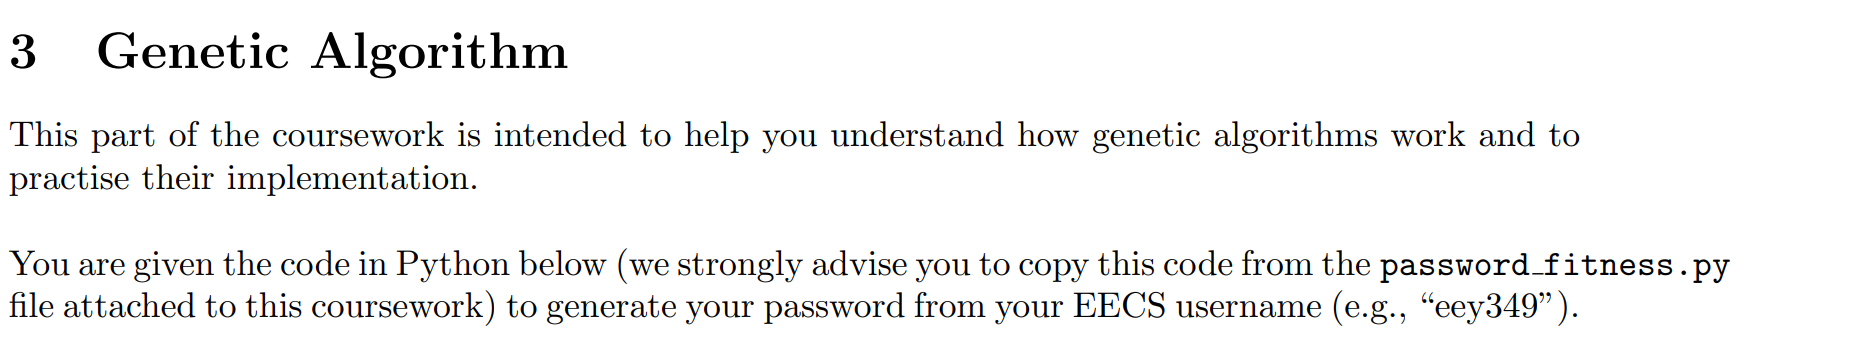

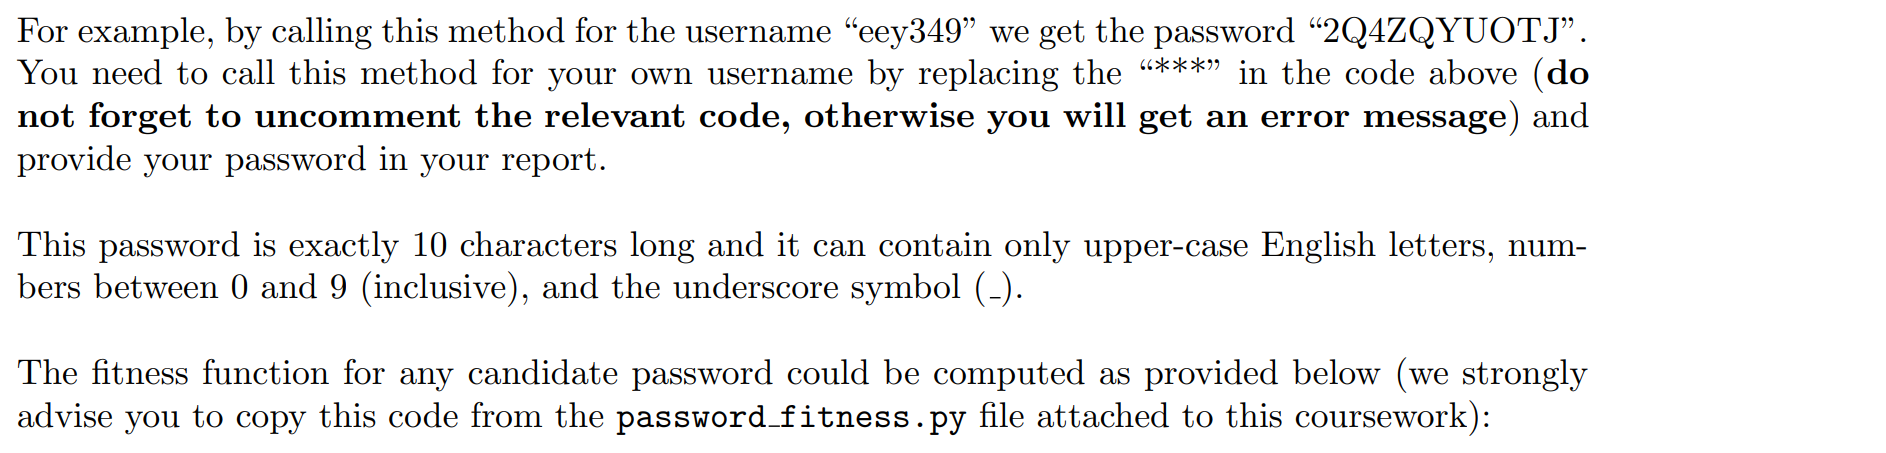

In [382]:
import math
import hashlib
import string

def get_password(student_username, l=10):
    # Possible characters include upper-case English letters, numbers between 0 and 9 (inclusive), 
    # and the underscore symbol
    options = string.digits + string.ascii_uppercase  + "_"

    h = hashlib.sha256(("ECS759P-AI"+student_username).encode("utf-8"))
    d = h.digest()
    s = ""
    for n in d:
      s += options[n%len(options)]

    return s[0:l]

# TO DO: replace *** with your EECS username and uncomment the code
student_password = get_password('ec23752')
print(student_password)

# Distance function
def distance_function(string_one, string_two):
    score = 0
    for i, j in zip(string_one, string_two):
        # Square of the absolute difference between two Unicode codes
        score += math.sqrt(abs(ord(i) - ord(j)))
    return score


# Upper bound of the distance value
MAX_VALUE = distance_function('0000000000', '__________')

# Compute normalised fitness for a list of candidate passwords 
def get_normalised_fitness(list_of_phrases, student_password):
    ordered_dict = dict()
    phrase_to_find = student_password
    for phrase in list_of_phrases:
        # Return 1 when a candidate matches the true password (string distance between them is zero)
        ordered_dict[phrase] = 1 - distance_function(phrase, phrase_to_find) / MAX_VALUE
    return ordered_dict

# Example of how to get fitness values for a list of candidates
get_normalised_fitness(['2Q4HHHHOTJ', '2HHZQYUOTJ'], student_password)

RBPI951WUT


{'2Q4HHHHOTJ': 0.47722338850461055, '2HHZQYUOTJ': 0.4318914343957473}

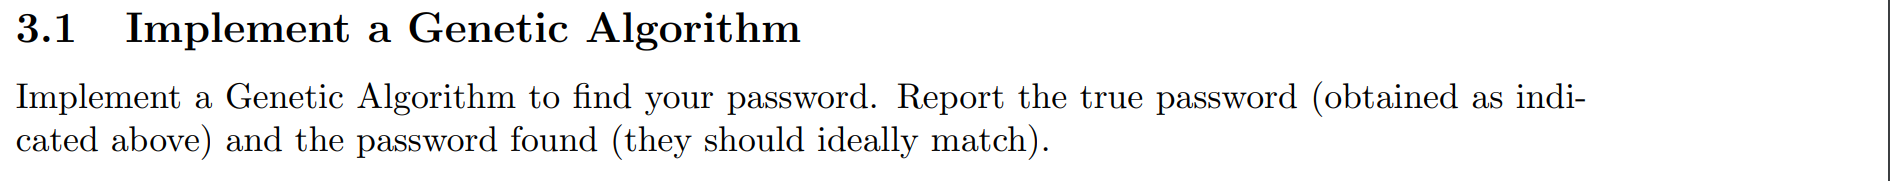

In [383]:
import random, copy
# from random import choices, randrange, random

class Genome:
    
    def __init__(self, length, child_pass=None):
        
        self.options = string.ascii_uppercase + string.digits + '_'
        
        if child_pass == None:
            
            
            self.password = ''.join(self.generate_char() for _ in range(length))
    
        else:
            
            self.password = child_pass
            
    def generate_char(self):
        
        return random.choice(self.options)
    
    
    def mutation(self, probability):
        
        old_pass = self.password
                                        
        for index in range(len(self.password)):
            
            if random.random() <= probability:

                new_char = self.generate_char()
                self.password = self.password[:index] + new_char + self.password[index + 1:]
                
        if old_pass == self.password:

            print("Alert mutation generate the same answer ")


    def chaneg_password(self, given_password):
        self.password = given_password
                
        
    def __str__(self):
        return self.password

In [384]:
def crossover(genome_a, genome_b):

    if len(genome_b.password) == len(genome_a.password) and len(genome_a.password) > 2 :

        random_number = random.randrange(1, len(genome_a.password)-1)

        password_a = genome_a.password[0:random_number] + genome_b.password[random_number:]
        password_b = genome_b.password[0:random_number] + genome_a.password[random_number:]

        children = {password_a, password_b}
        parents = {genome_b.password, genome_a.password}
        
        
        
        if children.isdisjoint(parents) == False:
            print("Alert crossover generate the same answer")
            print(random_number, children, parents, children.intersection(parents))
            
            
        return Genome(10,password_a), Genome(10, password_b)

    return None

In [385]:
def crossing_over(pool_to_cross, pCO):

  for index, genome_a in enumerate(pool_to_cross):
    # TO DO
    # If crossing over should be applied on this individual for the given crossover rate
    if random.random() <= pCO:
      # We get the list of all the other selected individuals
      others = pool_to_cross[:]
      others.remove(genome_a)
      # We pick randomly one of them
      genome_b = random.choice(others)
      # We get its index in order to modify it directly
      genome_b_index = pool_to_cross.index(genome_b)
    
      c_a, c_b = crossover(genome_a, genome_b)
        
      
      all_other_passwords=[gene.password for gene in others]
        
      if c_a.password not in all_other_passwords and c_b.password not in all_other_passwords:
        
        pool_to_cross [index] = c_a
        pool_to_cross [genome_b_index] = c_b
        
      else:
        print("Crossover refused due to repetitive password!")

  return pool_to_cross

In [386]:
def create_population(number):
    
    population = []
    
    for i in range(number):
        
        population.append(Genome(10))
        
    return population



def select_best_parents(population, population_fitnesses, target_password = student_password, pair_numbers=2):
    ##changed check if it is needed for finding fiteness again or not
    return choices(population, population_fitnesses, k= pair_numbers)


def sort_population(population, target_password = student_password):
    
    passwords = []
    
    for genome in population:
        
        passwords.append(genome.password)
    
    passwords_weights = get_normalised_fitness(passwords, target_password)
    
    
    combined_list = list(zip(population, list(passwords_weights.values())))

    sorted_list = sorted(combined_list, key=lambda x: x[1], reverse=True)

    sorted_genes = []
    sorted_fitnesses = []
    
    
   
    
    for gene, fitness in sorted_list:
        
        sorted_genes.append(gene)
        sorted_fitnesses.append(fitness)
        print(gene, fitness)
    
    print("\n{} genomes\n".format(len(sorted_genes)))
    
    return sorted_genes, sorted_fitnesses

In [387]:
def run_evolution(population_size, fitness_limit: int = 1, generation_limit: int = 400, pMuta = 0.2, pCO = 0.8):
    
    population = create_population(population_size)
    print("FIRST GENERATION\n\n")
    population, population_fitnesses = sort_population(population)
    half = int(population_size / 2)

    
    for i in range(generation_limit):
        
          mating_pool = copy.deepcopy(population)[:half]
          # perform cross over and mutation over the best parents
          mating_pool = crossing_over(mating_pool, pCO)

          for gene in mating_pool:

                gene.mutation(pMuta)

          # combine the best of parents and offsprings to form a new population
          print("\n\nGENERATION {}\n".format(i+1))
            
          population = copy.deepcopy(population)[:half] + mating_pool
          population, population_fitnesses = sort_population(population)
        
          if population_fitnesses[0] == fitness_limit: ## check if we can STOP the processes
                
                print("Answer found on generation {} \nPassword is {}".format(i+1, population[0].password))
                break


#     population, population_fitnesses = sort_population(population)   ##check if it is needed


In [391]:
run_evolution(population_size = 20)

FIRST GENERATION


OVP913QQJT 0.6226502392520569
LDMR63WNP7 0.5838812347897228
N46F_2_WXT 0.5772311325679664
0QXI6C179O 0.5450398652312722
O_LYXT1CVP 0.5372450605445154
EMECY85HK_ 0.5269732309610031
67YSE401NF 0.5217622342484949
NF_U6MCCIK 0.5165014073229713
FCPSROZWG5 0.5122574469551068
QBF1NQVNNF 0.4981441059042875
P4NU8KMAI6 0.494609202502756
P94S92Q0I2 0.4778478132778261
W4555DZSM_ 0.4739062081889026
Z_RDR2D2W3 0.47202179701475855
F_UITGUO7Y 0.45933903693562217
Q5CYTHQKOC 0.4535940426751528
87YTYSIZSG 0.45275621021477297
GELYZTBQI9 0.4516373095672238
09TWZHFZ3P 0.4337280459433157
3OWCX_ZITL 0.4123060035729377

20 genomes

Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 


GENERATION 1

NQXI6C1V9O 0.6688472423392315
OVP913QQJT 0.6226502392520569
JDQSE401NF 0.614612400956032
LDMR63WNP7 0.5838812347897228
N46F_2_WXT 0.5772311325679664
QBF1NQVNXT 0.5660494798126714
O_P913QQNF 0.5645403578209677
OMECY85HK_ 0.55430

TVNK961SUU 0.803024632281616
OAQG961WBZ 0.7955768547291955
8VNT9A1SUI 0.7794531576023261
TDNKD61WUU 0.7723170953022307
T7DK96AWUU 0.7575467830593575
O7QG961WUU 0.6633039210367495

19 genomes

Alert crossover generate the same answer
4 {'OBNK961WUU', 'TDNP961WUU'} {'OBNK961WUU', 'TDNP961WUU'} {'OBNK961WUU', 'TDNP961WUU'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
5 {'ABQG961WUU', 'T7NK961WUU'} {'ABQG961WUU', 'T7NK961WUU'} {'ABQG961WUU', 'T7NK961WUU'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
7 {'OBQG9A1WUU', 'T7NK961WUU'} {'OBQG9A1WUU', 'T7NK961WUU'} {'OBQG9A1WUU', 'T7NK961WUU'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
8 {'T7NK961WUU', 'OBNK9615UU'} {'T7NK961WUU', 'OBNK9615UU'} {'T7NK961WUU', 'OBNK9615UU'}
Crossover refused due to repetitive password!
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generat

Alert crossover generate the same answer
7 {'OBQG761WUT', 'RBQD961WUT'} {'RBQD961WUT', 'OBQG761WUT'} {'RBQD961WUT', 'OBQG761WUT'}
Crossover refused due to repetitive password!
Alert mutation generate the same answer 


GENERATION 81

RBQD961WUT 0.938210598047749
OBQG961WUT 0.9249340191432497
NBQG961WUT 0.9210255784756664
RBKD961WUT 0.9201806935448663
TBQG961WUU 0.9149836527002799
OBQD961WUT 0.9129460404157534
OBQG961WUU 0.9103475199934602
NBQG961WUU 0.9064390793258769
OBQG761WUT 0.9043055942180738
RB_D961WUT 0.8963038289109352
NBQGY61WUU 0.8863417698938516
TBQG161WUU 0.8803296367630813
RBQD961WUT 0.8744049038792585
RZKD961W1T 0.8737268028499282
OBQGE61WUT 0.8726476337909767
OBQB761WUT 0.8636874252582631
OOTG9E1WUR 0.8239253796251733
OBQD941WPT 0.7933672270048382
NBQG961WJT 0.7612027385450799

19 genomes

Alert crossover generate the same answer
2 {'OBQG961WUT', 'OBQD961WUT'} {'OBQG961WUT', 'OBQD961WUT'} {'OBQG961WUT', 'OBQD961WUT'}
Crossover refused due to repetitive password!
Alert cr

8 {'RBQQ941WUT', 'RBOG941WUT'} {'RBQQ941WUT', 'RBOG941WUT'} {'RBQQ941WUT', 'RBOG941WUT'}
Crossover refused due to repetitive password!
Crossover refused due to repetitive password!
Alert mutation generate the same answer 


GENERATION 114

RBQG961WUT 0.9501985767752452
RBQG941WUT 0.9501985767752452
RBOG941WUT 0.9501985767752452
RBQL961WUT 0.9455624440684255
RBQD961WUT 0.938210598047749
RBQG961WUU 0.9356120776254557
TBQG961WUT 0.9295701518500694
TBQG941WUT 0.9295701518500694
RBQQ941WUT 0.9295701518500694
RBIG941WUT 0.9261928266756367
OBQG961WUT 0.9249340191432497
RBYG941WUT 0.9210255784756664
R0QG961WUT 0.8883133019997176
TBQB961WDT 0.851464650823283
RB9G965WUU 0.8510711860383319
RBQQ9411UT 0.8396529322368121
R_Y1941WUT 0.791644341419049
RBIG941WUT 0.7812489905350968
TO43944WU1 0.6550320109610727

19 genomes

Alert crossover generate the same answer
3 {'RBQG941WUT', 'TBQG941WUT'} {'RBQG941WUT', 'TBQG941WUT'} {'RBQG941WUT', 'TBQG941WUT'}
Crossover refused due to repetitive password!
Aler

Alert crossover generate the same answer
7 {'IBQG961WUT', 'RBJG961WUT'} {'IBQG961WUT', 'RBJG961WUT'} {'IBQG961WUT', 'RBJG961WUT'}
Crossover refused due to repetitive password!


GENERATION 148

RBQG951WUT 0.9647850759250347
RBPG961WUT 0.9647850759250347
RBQJ961WUT 0.9562405025506316
RBQG961WUT 0.9501985767752452
RBQG961WUT 0.9501985767752452
RBQG941WUT 0.9501985767752452
2BXY96VWUN 0.9066705367960942
RBQ49R1WH3 0.883443591448625
RBOG941WUT 0.8744779135835283
RBOGX4WWUT 0.855182342371486
RBJG961IUT 0.8424748765949228
IBQG951W8T 0.8363785906343743
RBFJF61QUT 0.825934109996441
RBQG941UKT 0.7790671670173399
RTQJO6XWUT 0.7788865237168693
RBQGFA1QUT 0.7652495392972954
7BBG961ITT 0.7348458242882054
1BQG961W1T 0.7036336337174309
RBJG969WUY 0.6788412641729066

19 genomes

Crossover refused due to repetitive password!
Alert crossover generate the same answer
4 {'RBQJ961WUT', 'RBQG961WUT'} {'RBQJ961WUT', 'RBQG961WUT'} {'RBQJ961WUT', 'RBQG961WUT'}
Crossover refused due to repetitive password!
Aler

RBPJ951WUT 0.9854135008502105
RBPK951WUT 0.9793715750748241
RBPJ961WUT 0.9708270017004211
RBQG951WUT 0.9647850759250347
RBPG961WUT 0.9647850759250347
RBQK951WUT 0.9647850759250347
RBPK951WUS 0.9647850759250347
RBPC951WUT 0.9642705199494752
RBPK951WUR 0.9587431501496483
RBPQ951WUT 0.9587431501496483
RBQJ961WUT 0.9562405025506316
RBPQ951YUT 0.9381147252244724
R3PG961WUT 0.9082918076384314
RBPJQ61WUT 0.8993680415993714
RBPK9L1WUS 0.8948306834877002
REQK9G1WUT 0.8776352435175115
MBPJ951WU9 0.8770034243015518
RBQJZ61WUT 0.8724474443909924
RY9G951WUT 0.8394627902001552
R5VK951WPR 0.8378048958323736

20 genomes

Alert crossover generate the same answer
4 {'RBPJ951WUT', 'RBQG951WUT'} {'RBPJ951WUT', 'RBQG951WUT'} {'RBPJ951WUT', 'RBQG951WUT'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
4 {'RBPJ951WUT', 'RBPK951WUT'} {'RBPJ951WUT', 'RBPK951WUT'} {'RBPJ951WUT', 'RBPK951WUT'}
Crossover refused due to repetitive password!
Alert crossover generate the same a